# Codex_project
# Data Cleaning Instructions

In this phase, you will clean the survey data to ensure it's ready for modeling. Follow the guidelines below to help you structure your approach. 
While some hints are approved, you are encouraged to explore the best methods to handle these tasks.

**Step1: Remove Duplicates**
 - Investigate if the dataset contains duplicate entries. Consider which columns could help identify duplicates. Think about how duplicate records might
affect the outcome of the model and remove them accordingly.

**Step2: Outlier Detection in Age:**
 - Explore the 'age' columns to spot potential outliers. You can use statistical methods or visualizations (e.g: box_plots) to help identify these. Reflect
on why it's important to handle these outliers. Based on your findings, decide whether to keep, adjust, or remove them. 

**Step3: Handle Missing Data:**
- For the 'income_levels' column, missing values can be problematic. What would be a reasonable way to replace them? (Hint: Consider using "Not Reported" 
for missing income levels)

**Step4: Correcting Spelling Mistakes in Categorical Data:**
- Review the entries in the 'zone' and 'current_brand' columns. Are these any inconsistencies in spelling or formatting ? How could you identify and fix
these issues to ensure uniform categories?


In [1]:
import pandas as pd
df = pd.read_csv('survey_results.csv')
df.head(5)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


**Step1: Remove Duplicates**
 - Investigate if the dataset contains duplicate entries. Consider which columns could help identify duplicates. Think about how duplicate records might
affect the outcome of the model and remove them accordingly.


In [2]:
# Display the shape of dataframe
{'df shape': df.shape}

{'df shape': (30010, 17)}

In [3]:
# Find the sum of duplicated rows
df.duplicated().sum()

10

In [4]:
df[df.duplicated(subset=['respondent_id', 'age'])]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [5]:
# List the original & duplicated rows 
df[df.duplicated(keep=False)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2308,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2665,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5150,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7793,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8515,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150


In [6]:
df.iloc[[2308,2309]]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2308,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200


In [7]:
df1=df.copy()
df1.drop_duplicates(inplace=True)
df1.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [8]:
# shape of the dataframe after doppped duplicate rows
df1.shape

(30000, 17)

**Duplicate record might affect the outcome of the model in the following areas/ Key Performance Indicators**
- The model won't generalize well to other customer types (overfit).
- Duplicates ➔ Biased learning ➔ Overfitting ➔ Wrong predictions ➔ Misleading KPIs.(Key Performance Indicators)
- Always detect and handle duplicates carefully before building machine learning models.

**Step2: Outlier Detection in Age:**
- Explore the 'age' columns to spot potential outliers. You can use statistical methods or visualizations (e.g: box_plots) to help identify these. Reflect
on why it's important to handle theser outliers. Based on your findings, decide whether to keep, adjust, or remove them. 

In [9]:
# **2.Outlier Detection in Age** 
# 🔎 2.1 Explore Basic Statistics
# Get summary statistics 
# To check min, max, mean, quartiles / quantiles
df1['age'].describe()

count    30000.000000
mean        33.048167
std         13.438904
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max        604.000000
Name: age, dtype: float64

In [10]:
# Gaussian/normal Distribution, But the mean+3*std gives age 73 years, But human age can be upto 100 years or some can live upto 120 years. This method is not to filter outliers rows
mean=df1['age'].mean()
median=df1['age'].median()
mode=df1['age'].mode()[0]
std=df1['age'].std()

In [11]:
mean+3*std

73.36487785433714

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30000 non-null  object
 1   age                             30000 non-null  int64 
 2   gender                          30000 non-null  object
 3   zone                            30000 non-null  object
 4   occupation                      30000 non-null  object
 5   income_levels                   21939 non-null  object
 6   consume_frequency(weekly)       29992 non-null  object
 7   current_brand                   30000 non-null  object
 8   preferable_consumption_size     30000 non-null  object
 9   awareness_of_other_brands       30000 non-null  object
 10  reasons_for_choosing_brands     30000 non-null  object
 11  flavor_preference               30000 non-null  object
 12  purchase_channel                29990 non-null  obj

<img src="./src_files/KPI cheat sheet.png">

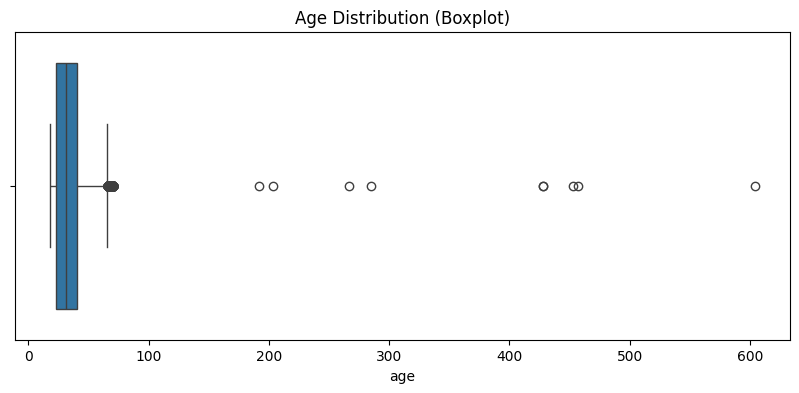

In [13]:
# Visualization method to identify outliers

import matplotlib.pyplot as plt
import seaborn as sns 

# Check for outliers in 'age'
plt.figure(figsize=(10,4))
sns.boxplot(x=df1['age'])
plt.title("Age Distribution (Boxplot)")
plt.show()

In [14]:
# Find statistical outliers using IQR
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3-Q1 
lower_bound = Q1-1.5*IQR  # We use 1.5*IQR regularly 
upper_bound = Q3+1.5*IQR 
(lower_bound, upper_bound)

print(f"upper_bound={upper_bound}years")
print(f"upper_bound filters outliers age, rows of age above 65.5 years. But this is not an acceptable outlier age")
outliers = df1[(df1['age']<lower_bound) | (df1['age']>upper_bound)]
print(f"No. of outliers in age: {outliers.shape[0]} rows out of {df1.shape[0]} rows")


upper_bound=65.5years
upper_bound filters outliers age, rows of age above 65.5 years. But this is not an acceptable outlier age
No. of outliers in age: 493 rows out of 30000 rows


In [15]:
Q3+4*IQR

108.0

In [16]:
# No. of outliers of 'age' column (above Q3+4*IQR= 108 years)
df1[df1['age']>(Q3+4*IQR)].value_counts().sum()

8

In [17]:
# No. of outliers of 'age' column (above (Q3+4*IQR = 108 years)
df1[df1['age']>(Q3+4*IQR)].shape[0]                    # Counts number of rows where age is an outlier

9

In [18]:
# Outliers dataframe/outliers rows filtered 
df1[df1['age']>(Q3+4*IQR)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


<img src="./src_files/shape, value_counts.png">

<img src="./src_files/value_counts_avoided_1_row.png">

In [19]:
# DataFrame with No outliers
df1=df1[df1['age']<(Q3+4*IQR)]
df1.shape

(29991, 17)

In [20]:
mean = df1['age'].mean()
median = df1['age'].median()
mode = df1['age'].mode()
(mean, median, mode)

(32.94748424527358,
 31.0,
 0    19
 Name: age, dtype: int64)

**Step3: Handle Missing Data:**
- For the 'income_levels' column, missing values can be problematic. What would be a reasonable way to replace them? (Hint: Consider using "Not Reported" 
for missing income levels)

In [21]:
df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8064
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [22]:
df1.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [23]:
# null values in the dataframe # NaN values od 8060 rows
df1[df1['income_levels'].isnull()].shape

(8060, 17)

In [24]:
df1.groupby('occupation')['income_levels'].value_counts()

occupation            income_levels
Entrepreneur          16L - 25L        1392
                      10L - 15L        1246
                      26L - 35L        1076
                      <10L              710
                      > 35L             576
Retired               <10L              790
                      10L - 15L         221
                      16L - 25L         119
Working Professional  16L - 25L        4386
                      10L - 15L        3784
                      <10L             3161
                      26L - 35L        2796
                      > 35L            1674
Name: count, dtype: int64

In [25]:
# Replace missing 'income_levels' or NaN with "not_reported"
df1['income_levels']=df1['income_levels'].fillna('Not Reported')

# Check if any missing values still exist 
df1['income_levels'].isnull().sum()

0

In [26]:
# sum of income_levels column with "Not Reported"
df1[df1['income_levels']=='Not Reported'].shape[0]

8060

In [27]:
df1[df1['purchase_channel'].isnull()].shape[0]

10

In [28]:
df1_null=df1[df1['consume_frequency(weekly)'].isnull()]
df1_null.shape

(8, 17)

In [29]:
df1['consume_frequency(weekly)'].mode()[0]

'3-4 times'

In [30]:
df1[df1.age.isnull()].shape

(0, 17)

In [31]:
# To fill missing values with different values per column 
impute_values = {
    'income_values': 'Not Reported',
    'consume_frequency(weekly)': df1['consume_frequency(weekly)'].mode()[0],
    'purchase_channel':'Other',
    'age': df1['age'].median() # numeric column using median, not required as it is 0 null here.
}

# Fill missing values accordingly
df1.fillna(value=impute_values, inplace=True)

In [32]:
'''
# 2. Fill missing values in all columns with the same value
# For example, fill all NaNs with 'Unknown'
df1.fillna('Unknown', inplace=True)


# 3. Fill missing values only for selected columns, keeping others unchanged
# Only specific columns
columns_to_impute = ['income_levels', 'zone', 'current_brand']

# Apply on selected columns
df1[columns_to_impute] = df1[columns_to_impute].fillna('Unknown')

'''


'''
# Fill NA values of income_levels columns with 'Not Reported' value

df.fillna(
    {'income_levels': 'Not Reported',
      'consume_frequency(weekly)': df['consume_frequency(weekly)'].mode()[0],      # filling with highest frequency value
      'purchase_channel': df['purchase_channel'].mode()[0]                         # filling with highest frequency value
    }, 
    inplace=True)

'''

"\n# Fill NA values of income_levels columns with 'Not Reported' value\n\ndf.fillna(\n    {'income_levels': 'Not Reported',\n      'consume_frequency(weekly)': df['consume_frequency(weekly)'].mode()[0],      # filling with highest frequency value\n      'purchase_channel': df['purchase_channel'].mode()[0]                         # filling with highest frequency value\n    }, \n    inplace=True)\n\n"

In [33]:
# before the fill
df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8064
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [34]:
# After the fill
# fillna with 'income_levels' (8064 rows) :"Not reported" , consume_frequency(weekly) (8 rows) with mode() : "3-4 times" , purchase_channel (10 rows) : "Other"
df1.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

In [35]:
mode_range=df1['consume_frequency(weekly)'].mode()
mode_range[0]

'3-4 times'

In [36]:
print(f"Mode of purchases ranges:", mode_range.values)

Mode of purchases ranges: ['3-4 times']


In [37]:
df1.groupby('consume_frequency(weekly)')['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
0-2 times     8423
3-4 times    11794
5-7 times     9774
Name: count, dtype: int64

# 4. Fix Spelling Mistakes in 'zone' and 'current_brand'

**Step4: Correcting Spelling Mistakes in Categorical Data:**
- Review the entries in the 'zone' and 'current_brand' columns. Are these any inconsistencies in spelling or formatting ? How could you identify and fix
these issues to ensure uniform categories?

In [38]:
# Normalize zone and current_brand columns
df1['zone']=df1['zone'].str.strip()
df1['current_brand']=df1['current_brand'].str.strip()

In [39]:
# List of unique current_brand
df1['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [40]:
# List Unique Zones
df1['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [41]:
df1['current_brand'].value_counts()

current_brand
Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: count, dtype: int64

In [42]:
# Count Occurrences of Each Zone
df1['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [43]:
# Total sum of all current_brand
df1['current_brand'].value_counts().sum()

29991

In [44]:
# Total sum of all zone counts
df1['zone'].value_counts().sum()

29991

In [45]:
# Manual correction, Replace "Metor" with "Metro" and "urbna" with "Urban"
df1['zone'] = df1['zone'].replace({'Metor':'Metro', 'urbna':'Urban'})

In [46]:
# Replaced 'Establishd' with 'Established' and 'newcomer' with 'Newcomer'
df1['current_brand'] = df1['current_brand'].replace({'newcomer':'Newcomer', 'Establishd': 'Established'})

In [47]:
df1.zone.value_counts()

zone
Metro         11910
Urban         10691
Semi-Urban     5274
Rural          2116
Name: count, dtype: int64

In [48]:
df1.current_brand.value_counts()

current_brand
Established    15462
Newcomer       14529
Name: count, dtype: int64

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   age                             29991 non-null  int64 
 2   gender                          29991 non-null  object
 3   zone                            29991 non-null  object
 4   occupation                      29991 non-null  object
 5   income_levels                   29991 non-null  object
 6   consume_frequency(weekly)       29991 non-null  object
 7   current_brand                   29991 non-null  object
 8   preferable_consumption_size     29991 non-null  object
 9   awareness_of_other_brands       29991 non-null  object
 10  reasons_for_choosing_brands     29991 non-null  object
 11  flavor_preference               29991 non-null  object
 12  purchase_channel                29991 non-null  obj

In [50]:
df1.income_levels.value_counts()

income_levels
Not Reported    8060
16L - 25L       5897
10L - 15L       5251
<10L            4661
26L - 35L       3872
> 35L           2250
Name: count, dtype: int64

In [51]:
df1['purchase_channel'].value_counts()

purchase_channel
Online          16562
Retail Store    13419
Other              10
Name: count, dtype: int64

# FEATURE ENGINEERING

In this task, you will be performing feature engineering by adding new columns to an existing dataset. You are required to create four new columns
by following the instructions below.

In [52]:
print('*'*150)

******************************************************************************************************************************************************


**Step1 : Categorize Age into Age Groups** 

**Objective: Create a new column 'age_group' by categorizing the existing 'age' column into specific age ranges.
● Categorize ages into the following groups:
○ 18-25
○ 26-35
○ 36-45
○ 46-55
○ 56-70
○ 70+
● Ensure that each age in the dataset is mapped to one of these age groups.
● After that, remove the original `age` column from the dataset.


In [53]:
# Example 

import pandas as pd 
data = {
    'name':['a', 'b','c','d','e','f', 'g', 'h', 'i'],
    'age': [18,56,45,35,70,72,85,14,26]
}
dataframe1 = pd.DataFrame(data)
dataframe1

,name,age
0,a,18
1,b,56
2,c,45
3,d,35
4,e,70
5,f,72
6,g,85
7,h,14
8,i,26


In [54]:
# Define age_group function:
def categorize_age(age):
    if age<18:
        return 'under 18'
    elif 18 <= age <=25:
        return '18-25'
    elif 26 <= age <=35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 56 <= age <=70:
        return '56-70'
    else:
        return '70+'
dataframe1['age_group'] = dataframe1['age'].apply(categorize_age)
dataframe1

,name,age,age_group
0,a,18,18-25
1,b,56,56-70
2,c,45,36-45
3,d,35,26-35
4,e,70,56-70
5,f,72,70+
6,g,85,70+
7,h,14,under 18
8,i,26,26-35


In [55]:
df1['age_group'] = df1['age'].apply(categorize_age)

In [56]:
print('*'*150)

******************************************************************************************************************************************************


In [57]:
df2=df1.copy()
df2.shape

(29991, 18)

In [58]:
df2['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [59]:
df2['awareness_of_other_brands'].value_counts()

awareness_of_other_brands
0 to 1     12966
2 to 4     11225
above 4     5800
Name: count, dtype: int64

In [60]:
df2.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55


In [61]:
# Step 2: Create cf_ab_score (Consume Frequency and Awareness Brand Score)
# Define mapping
consume_map = {"0-2 times":1, "3-4 times":2 , "5-7 times": 3}
awareness_map = {"0 to 1":1, "2 to 4":2, "above 4":3}

# Apply mapping
df2["frequency_score"] = df2["consume_frequency(weekly)"].map(consume_map)
df2["awareness_score"] = df2["awareness_of_other_brands"].map(awareness_map)

# Calculate "cf_ab_score"
df2["cf_ab_score"] = round((df2["frequency_score"]/(df2["frequency_score"] + df2["awareness_score"])), 2)

# Drop helper columns if not needed 
df2.drop(["frequency_score","awareness_score"], axis=1, inplace = True)

In [62]:
df2.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60


In [63]:
df2.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age_group                         0
cf_ab_score                       0
dtype: int64

In [64]:
df2['cf_ab_score'].value_counts()

cf_ab_score
0.50    10244
0.67     5094
0.75     4043
0.60     3756
0.33     3029
0.40     2260
0.25     1565
Name: count, dtype: int64

In [65]:
df2['cf_ab_score'].max()

0.75

In [66]:
print('*'*150)

******************************************************************************************************************************************************


In [67]:
df2.zone.value_counts()

zone
Metro         11910
Urban         10691
Semi-Urban     5274
Rural          2116
Name: count, dtype: int64

In [68]:
df2.income_levels.value_counts()

income_levels
Not Reported    8060
16L - 25L       5897
10L - 15L       5251
<10L            4661
26L - 35L       3872
> 35L           2250
Name: count, dtype: int64

In [69]:
# Define mappings 
zone_map = {"Rural":1, "Semi-Urban":2, "Urban":3, "Metro":4}
income_map={"Not Reported":0, "<10L":1, "10L - 15L":2, "16L - 25L":3, "26L - 35L":4, "> 35L":5}

# Apply mappings
df2['zone_score'] = df2['zone'].map(zone_map)
df2['income_score']=df2['income_levels'].map(income_map)

# Calculate zas_score
df2['zas_score']=df2['zone_score']*df2['income_score']

# Drop helper columns zone_score and income_score
df2.drop(['zone_score','income_score'], axis=1, inplace=True)

In [70]:
df2.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20


In [71]:
df2['zas_score'].unique()

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10],
      dtype=int64)

In [72]:
df2['zas_score'].value_counts()

zas_score
0     8060
12    3671
4     3082
6     2991
8     2739
3     2085
9     2041
16    1508
2     1257
20     921
15     807
10     379
1      307
5      143
Name: count, dtype: int64

In [73]:
print('*'*150)

******************************************************************************************************************************************************


In [74]:
df2[(df2['current_brand']!='Established')]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
6,R00007,45,F,Urban,Entrepreneur,10L - 15L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Social (eg. Parties),200-250,36-45,0.60,6
8,R00009,27,F,Semi-Urban,Working Professional,<10L,5-7 times,Newcomer,Small (250 ml),2 to 4,Availability,Exotic,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),100-150,26-35,0.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R29986,24,F,Metro,Student,Not Reported,5-7 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Online,Premium,Low (Not very concerned),Social (eg. Parties),100-150,18-25,0.75,0
30001,R29992,23,F,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Medium (500 ml),above 4,Availability,Exotic,Online,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),200-250,18-25,0.25,12
30004,R29995,67,M,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Small (250 ml),2 to 4,Availability,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,2
30005,R29996,29,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35,0.50,12


In [75]:
df2['reasons_for_choosing_brands'].value_counts()

reasons_for_choosing_brands
Price               14138
Availability         6590
Brand Reputation     4661
Quality              4602
Name: count, dtype: int64

In [76]:
# check if the reasons_for_choosing_brands are either "Price" or"Quality".
df2[df2['reasons_for_choosing_brands'].isin(["Price","Quality"])].shape

(18740, 20)

In [77]:
# Create a column of bsi with AND conditions , True when both are True else False , rows with not established brand and having either 'Price' or 'Quality' in "reasons_for_choosing _brand"
df2['bsi']=((df2['current_brand']!='Established') & (df2['reasons_for_choosing_brands'].isin(['Price','Quality']))).astype(int)

In [78]:
df2.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,...,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,...,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,...,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,...,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0


In [79]:
df2['bsi'].value_counts()

bsi
0    20816
1     9175
Name: count, dtype: int64

In [80]:
print('*'*150)

******************************************************************************************************************************************************


In [81]:
df2['occupation'].value_counts()

occupation
Working Professional    15801
Student                  8060
Entrepreneur             5000
Retired                  1130
Name: count, dtype: int64

In [82]:
# Remove logical inconsistencies like students in '56-70' group
df3_incosistent=df2[((df2['occupation']=='Student')& (df2['age_group']=='56-70'))]
df3_incosistent.shape

(35, 21)

In [83]:
df3=df2[~((df2['occupation']=='Student')& (df2['age_group']=='56-70'))]
df3.shape

(29956, 21)

In [84]:
# To remove logical inconsistencies. 
df2[(df2['occupation']=='Student')].groupby('age_group')[['occupation']].count()

,occupation
age_group,
18-25,7328
26-35,697
56-70,35


In [85]:
df2[(df2['occupation']=='Student')].groupby(['age_group','bsi'])[['bsi']].count()

bsi
age_group bsi      
18-25     0    4812
          1    2516
26-35     0     481
          1     216
56-70     0      20
          1      15

In [86]:
df2.groupby('age_group')['occupation'].value_counts()

age_group  occupation          
18-25      Student                 7328
           Working Professional    2605
           Entrepreneur             535
26-35      Working Professional    6570
           Entrepreneur            1826
           Student                  697
36-45      Working Professional    4353
           Entrepreneur            1619
46-55      Working Professional    2167
           Entrepreneur             799
56-70      Retired                 1130
           Entrepreneur             221
           Working Professional     106
           Student                   35
Name: count, dtype: int64

In [87]:
'''
# Alternative to remove logical outliers
pd.crosstab(df['age_group'], df['occupation'], margins=True, margins_name='Total')
df = df[((df['age_group']=='56-70') & (df['occupation'] == 'Student'))==False]
'''

"\n# Alternative to remove logical outliers\npd.crosstab(df['age_group'], df['occupation'], margins=True, margins_name='Total')\ndf = df[((df['age_group']=='56-70') & (df['occupation'] == 'Student'))==False]\n"

In [88]:
# # Simple groupby with pivot
# pivot_table = df2.pivot_table(
#     index='age_group',       # Rows: Age groups
#     columns='occupation',    # Columns: Occupations
#    values='some_column',    # Any column (we will use 'occupation' counts instead)
#    aggfunc='count',         # Counting how many entries
#     fill_value=0             # Fill missing values with 0
# )

# pivot_table


In [89]:
print('*'*150)

******************************************************************************************************************************************************


In [90]:
# How many rows contain BSI types
df2['bsi'].value_counts()

bsi
0    20816
1     9175
Name: count, dtype: int64

In [91]:
# Internship question
# How many rows contain the Brand Switching Indicator (BSI) with a value of 0 after removing logical outliers 
df3['bsi'].value_counts()

bsi
0    20796
1     9160
Name: count, dtype: int64

In [92]:
# Difference in change i.e dropped rows , sum of removed types in bsi types
df2['bsi'].value_counts()-df3['bsi'].value_counts()

bsi
0    20
1    15
Name: count, dtype: int64

In [93]:
print('*'*150)
print("Modeling Instructions")
print('*'*150)

******************************************************************************************************************************************************
Modeling Instructions
******************************************************************************************************************************************************


Follow the steps below to guide you through the modeling process:
**1.Prepare Features and Target Variables:**
- Create a feature matrix 'X' and target variable 'y'. Ensure that 'X' does not include columns such as respondent_id and the target variable (price_rage).

**2.Data Splitting**
- Split the dataset into training and test sets, using 75% of the data for training and 25% for testing. In train_test_split function call, please use
  random_state value of 42, this way your notebook and our notebook have same split and it helps with results verification.

**3. Feature Encoding**
- Apply appropriate encoding techniques to the features:
      - Use Label Encoding for the following columns: age_group, income_levels, health_concerns, consume_frequency(weekly), and preferable_consumption_size.
- Apply One-Hot Encoding to all remaining categorical columns.
- Ensure the target variable(price_range) is also label encoded.

**4.Model Selection**
Test the following machine learning models on the prepared data:
- Gaussian Naive Bayes
- Logical Regression
- Support Vector Machine (SBM)
- Random Forest
- XGBoost
- Light Gradient Boosting Machine(Light GBM)

**5. Performance Evaluation:**
- For each model, calculate and print the accuracy score and the classification report.

**6. Model comparison:**
- Track the performance of each model and select the best-performing model for the next steps (which will be communicated in future tasks).

If you encounter any difficulties during the modeling phase, don't hesitate to reach out to your senior team members for guidance.
                                                                                            

In [94]:
# df4 = df3.copy()

In [95]:
df3.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,...,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,...,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,...,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0


In [96]:
df.columns  # 17 columns 

Index(['respondent_id', 'age', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range'],
      dtype='object')

In [97]:
df3.columns # 21 columns  ==> 8 for label encoding + 8 one-hot-encoding + 3 scores, bsi + 2 removing

Index(['respondent_id', 'age', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

## Label encoding

In [98]:
df3['age_group'].value_counts()

age_group
18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1457
Name: count, dtype: int64

In [99]:
df3['zone'].value_counts()

zone
Metro         11901
Urban         10677
Semi-Urban     5265
Rural          2113
Name: count, dtype: int64

In [100]:
df3['income_levels'].value_counts()

income_levels
Not Reported    8025
16L - 25L       5897
10L - 15L       5251
<10L            4661
26L - 35L       3872
> 35L           2250
Name: count, dtype: int64

In [101]:
df3['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11786
5-7 times     9765
0-2 times     8405
Name: count, dtype: int64

In [102]:
df3['preferable_consumption_size'].value_counts()

preferable_consumption_size
Medium (500 ml)    13205
Small (250 ml)      9709
Large (1 L)         7042
Name: count, dtype: int64

In [103]:
df3['awareness_of_other_brands'].value_counts()

awareness_of_other_brands
0 to 1     12945
2 to 4     11215
above 4     5796
Name: count, dtype: int64

In [104]:
df3['health_concerns'].value_counts()

health_concerns
High (Very health-conscious)            11893
Medium (Moderately health-conscious)    10624
Low (Not very concerned)                 7439
Name: count, dtype: int64

In [105]:
# Output enoding
df3['price_range'].value_counts()

price_range
200-250    9711
150-200    8797
100-150    7793
50-100     3655
Name: count, dtype: int64

In [114]:
# Label encoding, Converts categories to numeric labels (integers)

df3['age_group'] = df3['age_group'].map({'18-25':1, '26-35':2, '36-45':3, '46-55':4, '56-70':5, '70+':6})
df3['zone'] = df3['zone'].map({'Rural':1, 'Semi-Urban':2, 'Urban':3, 'Metro':4})
df3['income_levels'] = df3['income_levels'].map({'<10L':1, '10L - 15L':2, '16L - 25L':3, '26L - 35L':4, '> 35L':5})
df3['consume_frequency(weekly)'] = df3['consume_frequency(weekly)'].map({'0-2 times':1, '3-4 times':2, '5-7 times':3})
df3['preferable_consumption_size'] = df3['preferable_consumption_size'].map({'Small (250 ml)':1, 'Medium (500 ml)':2, 'Large (1 L)':3})
df3['awareness_of_other_brands'] = df3['awareness_of_other_brands'].map({'0 to 1':1, '2 to 4':2, 'above 4':3})
df3['health_concerns'] = df3['health_concerns'].map({'Low (Not very concerned)':1, 'Medium (Moderately health-conscious)':2, 'High (Very health-conscious)':3})

df3['price_range'] = df3['price_range'].map({'50-100':1, '100-150':2, '150-200':3, '200-250':4})



C:\Users\reach\AppData\Local\Temp\ipykernel_27292\2411925955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_group'] = df3['age_group'].map({'18-25':1, '26-35':2, '36-45':3, '46-55':4, '56-70':5, '70+':6})
C:\Users\reach\AppData\Local\Temp\ipykernel_27292\2411925955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zone'] = df3['zone'].map({'Rural':1, 'Semi-Urban':2, 'Urban':3, 'Metro':4})
C:\Users\reach\AppData\Local\Temp\ipykernel_27292\2411925955.py:5: SettingWithCopyWarning: 
A value

In [115]:
df3.isnull().sum()

respondent_id                         0
age                                   0
gender                                0
zone                              29956
occupation                            0
income_levels                     29956
consume_frequency(weekly)         29956
current_brand                         0
preferable_consumption_size       29956
awareness_of_other_brands         29956
reasons_for_choosing_brands           0
flavor_preference                     0
purchase_channel                      0
packaging_preference                  0
health_concerns                   29956
typical_consumption_situations        0
price_range                       29956
age_group                         29956
cf_ab_score                           0
zas_score                             0
bsi                                   0
dtype: int64

In [112]:
df3.isnull().sum()

respondent_id                         0
age                                   0
gender                                0
zone                              29956
occupation                            0
income_levels                         0
consume_frequency(weekly)         29956
current_brand                         0
preferable_consumption_size       29956
awareness_of_other_brands         29956
reasons_for_choosing_brands           0
flavor_preference                     0
purchase_channel                      0
packaging_preference                  0
health_concerns                   29956
typical_consumption_situations        0
price_range                       29956
age_group                             0
cf_ab_score                           0
zas_score                             0
bsi                                   0
dtype: int64

In [113]:
df3.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,...,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,30,M,NaN,Working Professional,1,NaN,Newcomer,NaN,NaN,...,Traditional,Online,Simple,NaN,"Active (eg. Sports, gym)",NaN,2,0.67,3,1
1,R00002,46,F,NaN,Working Professional,5,NaN,Established,NaN,NaN,...,Exotic,Retail Store,Premium,NaN,Social (eg. Parties),NaN,4,0.60,20,0
2,R00003,41,F,NaN,Working Professional,5,NaN,Newcomer,NaN,NaN,...,Traditional,Retail Store,Premium,NaN,"Active (eg. Sports, gym)",NaN,3,0.50,5,0


In [ ]:
# One-hot encoding 
nominal_cols = ['gender', '', '' ]

In [96]:
X=df4.drop(['respondent_id','price_range'], axis=1)
y = df4['price_range']

In [157]:
# Step2 : Data Splitting
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [158]:
# Steep 3: Feature Engineering
# Label Encoding for specific columns. 
# One-Hot_encoding for the rest
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label Encoding Columns
label_cols = ['age_group','income_levels','health_concerns', 'consume_frequency(weekly)','preferable_consumption_size']

le=LabelEncoder()

for col in label_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# One-hot encode other categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns after dummies (make sure X_train and X_test match)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)# Encode target variable y

y_le = LabelEncoder()
y_train = y_le.fit_transform(y_train)
y_test = y_le.transform(y_test)

In [159]:
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(22467, 29) (7489, 29)
(22467,) (7489,)


In [162]:
# Step 4: Model Selection
'''
1.GaussianNB
2.LogisticRegression
3.SVC (Support Vector Classifier)
4.RandomForestClassifier
5.XGBClassifier (XGBoost)
6.LGBMClassifier (LightGBM)
'''

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report 

# define models
models = {
    'GaussianNB':GaussianNB(),
    'LogisticRegression':LogisticRegression(max_iter=5000),
    'SVC':SVC(),
    'RandomForest':RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    model_results[name] = acc
    print(f"Model:{name}")
    print(f"Accuracy:{acc:.4f}")
    print("Classification Report:\n", report)
    print('-'*50)
    

Model:GaussianNB
Accuracy:0.5384
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.43      0.40      1930
           1       0.59      0.13      0.21      2223
           2       0.71      0.86      0.78      2430
           3       0.45      0.91      0.60       906

    accuracy                           0.54      7489
   macro avg       0.53      0.58      0.50      7489
weighted avg       0.56      0.54      0.49      7489

--------------------------------------------------
Model:LogisticRegression
Accuracy:0.8013
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1930
           1       0.75      0.77      0.76      2223
           2       0.91      0.89      0.90      2430
           3       0.80      0.75      0.77       906

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.79      7489
weighted avg

In [163]:
for k,v in model_results.items():
    print(k,round(v,2))

GaussianNB 0.54
LogisticRegression 0.8
SVC 0.75
RandomForest 0.89
XGBoost 0.92
LightGBM 0.92


In [164]:
print('*'*150)
print("Tracking Models in MLflow, Locally 'OPTIONAL' ")
print('*'*150)

******************************************************************************************************************************************************
Tracking Models in MLflow, Locally 'OPTIONAL' 
******************************************************************************************************************************************************


In [167]:
# Track all six models in MLflow locally (OPTIONAL)            # use gitbash to run :  mlflow ui   and go to    uri "http://localhost:5000"  or uri "http://127.0.0.1:5000"

import mlflow                 # Base MLflow module – needed for setting up experiments, runs, and logging
import mlflow.sklearn         # Logging scikit-learn models using mlflow.sklearn.log_model(...)  , For models like LogisticRegression, RandomForestClassifier, SVC, etc.
import mlflow.xgboost         # Logging XGBoost models using mlflow.xgboost.log_model(...) , If you're using XGBClassifier()
import mlflow.lightgbm        # Logging LightGBM models using mlflow.lightgbm.log_model(...) , If you're using LGBMClassifier()

# MLFlow experiment  # Initialize MLflow
mlflow.set_experiment("FMCG_Model_Comparison2")
mlflow.set_tracking_uri("http://localhost:5000")

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report 

# Define models 
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=5000),
    'SVC': SVC(),
    'RandomForest':RandomForestClassifier(),
    'XGBoost':XGBClassifier(eval_metric='mlogloss',use_label_encoder=False),
    'LightGBM':LGBMClassifier()  
}

model_results={}
# Loop through each model
for name,model in models.items():
    with mlflow.start_run(run_name=name):
        print(f"\nTraining: {name}")
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        # Metrics / Accuracy & Report
        acc=accuracy_score(y_test, y_pred)
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Log Parameters
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Log Accuracy
        mlflow.log_metric("accuracy",acc)

        # Log classification report
        for label, metrics in report_dict.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}", value)

        # save model / log model
        if name=='XGBoost':
            mlflow.xgboost.log_model(model,"model")
        elif name=="LightGBM":
            mlflow.lightgbm.log_model(model,"model")
        else:
            mlflow.sklearn.log_model(model,"model")

        model_results[name]=acc
        print(f"Accuracy:{acc:.4f}")
        


Training: GaussianNB


2025/07/22 21:20:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 21:20:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.5384
🏃 View run GaussianNB at: http://localhost:5000/#/experiments/930663568830388562/runs/fcd92efbce604b81a6d8cdc6f8d01862
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562

Training: LogisticRegression


2025/07/22 21:20:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 21:20:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.8013
🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/930663568830388562/runs/08b265a26abd4c4391ae2ccbfdf1f8d9
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562

Training: SVC


2025/07/22 21:21:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 21:21:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.7520
🏃 View run SVC at: http://localhost:5000/#/experiments/930663568830388562/runs/c7e9bb12aa4c452f81fd3b36fb2ff634
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562

Training: RandomForest


2025/07/22 21:21:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 21:21:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.8948
🏃 View run RandomForest at: http://localhost:5000/#/experiments/930663568830388562/runs/b85cfac26d30484bb342068c1c4f457a
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562

Training: XGBoost


C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/07/22 21:21:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [21:21:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/07/22 21:21:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.9207
🏃 View run XGBoost at: http://localhost:5000/#/experiments/930663568830388562/runs/d98e63f5215f488b87b0e569298f1acd
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562

Training: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 28
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810


2025/07/22 21:21:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/22 21:22:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.9207
🏃 View run LightGBM at: http://localhost:5000/#/experiments/930663568830388562/runs/b18e14146c584df0a95a2030b837e80a
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562


In [133]:
# print("Classification_report:",report_dict)

Classification_report: {'0': {'precision': 0.9041666666666667, 'recall': 0.8994818652849741, 'f1-score': 0.9018181818181819, 'support': 1930.0}, '1': {'precision': 0.8930150309460654, 'recall': 0.9086819613135403, 'f1-score': 0.9007803790412486, 'support': 2223.0}, '2': {'precision': 0.9601163273784794, 'recall': 0.9510288065843622, 'f1-score': 0.9555509613396733, 'support': 2430.0}, '3': {'precision': 0.92, 'recall': 0.9139072847682119, 'f1-score': 0.9169435215946844, 'support': 906.0}, 'accuracy': 0.9206836693817599, 'macro avg': {'precision': 0.9193245062478028, 'recall': 0.918274979487772, 'f1-score': 0.9187732609484471, 'support': 7489.0}, 'weighted avg': {'precision': 0.9209262593122547, 'recall': 0.9206836693817599, 'f1-score': 0.9207749419332323, 'support': 7489.0}}


In [138]:
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1930
           1       0.89      0.91      0.90      2223
           2       0.96      0.95      0.96      2430
           3       0.92      0.91      0.92       906

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489



In [142]:
# for label, metrics in report_dict.items():
#     if isinstance(metrics, dict):
#         for metric_name, value in metrics.items():
#             print(f"{label}_{metric_name}",value)

0_precision 0.9041666666666667
0_recall 0.8994818652849741
0_f1-score 0.9018181818181819
0_support 1930.0
1_precision 0.8930150309460654
1_recall 0.9086819613135403
1_f1-score 0.9007803790412486
1_support 2223.0
2_precision 0.9601163273784794
2_recall 0.9510288065843622
2_f1-score 0.9555509613396733
2_support 2430.0
3_precision 0.92
3_recall 0.9139072847682119
3_f1-score 0.9169435215946844
3_support 906.0
macro avg_precision 0.9193245062478028
macro avg_recall 0.918274979487772
macro avg_f1-score 0.9187732609484471
macro avg_support 7489.0
weighted avg_precision 0.9209262593122547
weighted avg_recall 0.9206836693817599
weighted avg_f1-score 0.9207749419332323
weighted avg_support 7489.0


# Register the Model

In [168]:
# mlflow.set_experiment("FMCG_Model_Comparison2")
mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.search_runs()

In [169]:
model_name = 'XGBoost'
run_id = input('Please type RunID')
model_uri = f'runs:/{run_id}/model'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Please type RunID d98e63f5215f488b87b0e569298f1acd


Successfully registered model 'XGBoost'.
2025/07/22 21:24:09 WARNING mlflow.tracking._model_registry.fluent: Run with id d98e63f5215f488b87b0e569298f1acd has no artifacts at artifact path 'model', registering model based on models:/m-7c121aecacad4166b30125c8c9469622 instead
2025/07/22 21:24:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1
Created version '1' of model 'XGBoost'.


🏃 View run XGBoost at: http://localhost:5000/#/experiments/930663568830388562/runs/d98e63f5215f488b87b0e569298f1acd
🧪 View experiment at: http://localhost:5000/#/experiments/930663568830388562


# Load the Model

In [170]:
model_version = 1
model_uri = f"models:/{model_name}/{model_version}"

loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:5]

array([0, 1, 2, 2, 2], dtype=int64)

# Transition the Model to Production

In [172]:
# Register the Model
current_model_uri = f"models:/{model_name}@challenger"
production_model_name='survey_results_production'
client=mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'survey_results_production'.
Copied version '1' of model 'XGBoost' to version '1' of model 'survey_results_production'.


<ModelVersion: aliases=[], creation_timestamp=1753199736899, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1753199736899, metrics=None, model_id=None, name='survey_results_production', params=None, run_id='d98e63f5215f488b87b0e569298f1acd', run_link='', source='models:/XGBoost/1', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [174]:
# Load the model
model_version=1
prod_model_uri = f"models:/{production_model_name}@champion"
loaded_model = mlflow.xgboost.load_model(prod_model_uri)
y_pred=loaded_model.predict(X_test)
y_pred[:5]

array([0, 1, 2, 2, 2], dtype=int64)

In [175]:
print('*'*150)
print("Tracking Models in MLflow using DagsHub")
print('*'*150)

******************************************************************************************************************************************************
Tracking Models in MLflow using DagsHub
******************************************************************************************************************************************************


In [147]:
# Dagshub setup
import dagshub
dagshub.init(repo_owner='reachmurali2', repo_name='mlflow_dagshub_survey_results', mlflow=True)

Initialized MLflow to track repo "reachmurali2/mlflow_dagshub_survey_results"

Repository reachmurali2/mlflow_dagshub_survey_results initialized!

In [148]:
# Tracking Models in MLflow using DagsHub 
import mlflow                 # Base MLflow module – needed for setting up experiments, runs, and logging
import mlflow.sklearn         # Logging scikit-learn models using mlflow.sklearn.log_model(...)  , For models like LogisticRegression, RandomForestClassifier, SVC, etc.
import mlflow.xgboost         # Logging XGBoost models using mlflow.xgboost.log_model(...) , If you're using XGBClassifier()
import mlflow.lightgbm        # Logging LightGBM models using mlflow.lightgbm.log_model(...) , If you're using LGBMClassifier()

In [151]:
# Ideally you will not require following 4 lines if you have started and do not have any previous dagshub credentials on your computer
# Publishing to centralized dagshub server 
import os 
os.environ['MLFlow_TRACKING_USERNAME']='reachmurali2'
os.environ['MLFLOW_TRACKING_PASSWORD']='15c692c817fb35b4abe13a93649923cf3557dd82'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow'

# MLFlow setup using DagsHub
mlflow.set_experiment("Survey_Model_Comparison")
mlflow.set_tracking_uri("https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow")

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models 
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=5000),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=True),
    'LightGBM': LGBMClassifier()
}
model_results={}
# Loop through each model
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        print(f"\nTraining: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics / Accuracy & Report 
        acc=accuracy_score(y_test, y_pred)
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Log Parameters 
        if hasattr(model, 'get_params'):           # is used to safely log all hyperparameters of a machine learning model to MLflow, only if the model supports the get_params() method. # Checks if the model object has a method named get_params. This is a safety check.
            mlflow.log_params(model.get_params())  # Logs this dictionary to MLflow, so you can track which parameters were used in each experiment run. # Returns a dictionary of all hyperparameters for the model (like C, max_depth, etc.).
        # Log accuracy    
        mlflow.log_metric("accuracy", acc)

        # Log classification report
        for label, metrics in report_dict.items():
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric_name}",value)
        
        # Log model / save model  
        if name =='XGBoost':
            mlflow.xgboost.log_model(model,"model")
        elif name == 'LightGBM':
            mlflow.lightgbm.log_model(model,"model")
        else:
            mlflow.sklearn.log_model(model, "model")

        model_results[name]=acc
        print(f"Accuracy:{acc:.4f}")
    

2025/05/01 16:24:19 INFO mlflow.tracking.fluent: Experiment with name 'Survey_Model_Comparison' does not exist. Creating a new experiment.



Training: GaussianNB


2025/05/01 16:24:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.5384
🏃 View run GaussianNB at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/40803876ad2c4e2ba17092fd59c976cb
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0

Training: LogisticRegression


2025/05/01 16:25:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.8013
🏃 View run LogisticRegression at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/d90b405ba6fa4214844224da5c86cde7
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0

Training: SVC


2025/05/01 16:26:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.7520
🏃 View run SVC at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/88ecdca5a688456abdc392b5b87407cb
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0

Training: RandomForest


2025/05/01 16:26:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.8938
🏃 View run RandomForest at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/8d2fc23f8d5a4bee8f89943d56563008
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0

Training: XGBoost


C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [16:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [16:27:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/05/01 16:27:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.9207
🏃 View run XGBoost at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/6b29ccd1ea9143f4bb5d245377ad1f9d
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0

Training: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 28
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810


2025/05/01 16:28:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy:0.9207
🏃 View run LightGBM at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/3b0eb14957b644c2b71b367d866d9c3f
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0


<!-- <img src='hasattr.png'> -->

# Register the model

In [153]:
model_name = 'XGBoost'
run_id=input("Please inpput RunID")
model_uri=f'runs:/{run_id}/model'
with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

Please inpput RunID 6b29ccd1ea9143f4bb5d245377ad1f9d


Successfully registered model 'XGBoost'.
2025/05/01 16:38:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 1
Created version '1' of model 'XGBoost'.


🏃 View run XGBoost at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0/runs/6b29ccd1ea9143f4bb5d245377ad1f9d
🧪 View experiment at: https://dagshub.com/reachmurali2/mlflow_dagshub_survey_results.mlflow/#/experiments/0


# Load the model

In [154]:
model_version=1
model_uri=f"models:/{model_name}/{model_version}"
loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred=loaded_model.predict(X_test)
y_pred[:6]

array([0, 1, 2, 2, 2, 3], dtype=int64)

# Transition the Model to Prodution

In [155]:
# Copy the model 
current_model_uri = f"models:/{model_name}@challenger"
production_model_name="survey_production"
client=mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'survey_production'.
Copied version '1' of model 'XGBoost' to version '1' of model 'survey_production'.


<ModelVersion: aliases=[], creation_timestamp=1746098040025, current_stage='None', description='', last_updated_timestamp=1746098040025, name='survey_production', run_id='6b29ccd1ea9143f4bb5d245377ad1f9d', run_link='', source='models:/XGBoost/1', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [156]:
# Load the model copied earlier
model_version=1 
prod_model_uri = f"models:/{production_model_name}@champion"
loaded_model = mlflow.xgboost.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:6]

array([0, 1, 2, 2, 2, 3], dtype=int64)